In [252]:
import pandas as pd
import requests
import pgeocode
from tqdm import tqdm
from haversine import haversine
import geopandas as gpd
import matplotlib.pyplot as plt

# Big Mobility Data Analytics for Public Health

## 1. Download datasets:</br>
### a. Download a data set on all recorded NYC taxi trips on 01/15/2015.

In [27]:
taxi_data = pd.read_csv("https://raw.githubusercontent.com/uber-web/kepler.gl-data/master/nyctrips/data.csv")
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
0,2,2015-01-15 19:05:39 +00:00,2015-01-15 19:23:42 +00:00,1,1.59,-73.993896,40.750111,-73.974785,40.750618,12.0,3.25,17.05
1,2,2015-01-15 19:05:39 +00:00,2015-01-15 19:32:00 +00:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,4.38,22.68
2,2,2015-01-15 19:05:40 +00:00,2015-01-15 19:21:00 +00:00,5,2.83,-73.968704,40.754246,-73.955124,40.786858,12.5,0.00,14.30
3,2,2015-01-15 19:05:40 +00:00,2015-01-15 19:28:18 +00:00,5,8.33,-73.863060,40.769581,-73.952713,40.785782,26.0,8.08,41.21
4,2,2015-01-15 19:05:41 +00:00,2015-01-15 19:20:36 +00:00,1,2.37,-73.945541,40.779423,-73.980850,40.786083,11.5,0.00,13.30
...,...,...,...,...,...,...,...,...,...,...,...,...
97981,1,2015-01-15 06:04:36 +00:00,2015-01-15 06:09:13 +00:00,1,1.00,-73.973167,40.744244,-73.975433,40.752487,5.5,1.26,7.56
97982,1,2015-01-15 06:04:36 +00:00,2015-01-15 06:43:36 +00:00,1,16.70,-73.965134,40.759991,-73.782372,40.644108,52.0,13.20,66.00
97983,1,2015-01-15 06:04:36 +00:00,2015-01-15 06:17:32 +00:00,1,4.50,-74.015182,40.715755,-73.981285,40.765930,15.5,1.00,17.30
97984,1,2015-01-15 06:04:37 +00:00,2015-01-15 06:09:38 +00:00,1,0.80,-73.971794,40.754051,-73.982391,40.759842,5.5,1.00,7.30


### b. Download a data set on NYC restaurant locations (and inspection results).

In [6]:
rest_data = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
rest_data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399913,41004284,CAFE CLASSICO,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
399914,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection
399915,50051468,Yong Kong Street,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,25.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
399916,41555297,RUBY FALLS NIGHTLIFE CAFE,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,09/19/2014,08/28/2017,Cycle Inspection / Re-inspection


## 2. Link the two datasets spatially by finding restaurants that were (assumed to be) visited at the destination of a taxi ride during lunchtime or dinnertime. You can implement this by finding the closest match to a restaurant address within a 50m buffer (radius of 50m) around a latitude longitude point in the taxi data; that is, count matches only if they are within 50m of the taxi destination.

***Step1: Pick out all taxi data whose dropoff time is within mealtime.***

In [35]:
taxi1=taxi_data.copy()
taxi1['tpep_dropoff_datetime']=taxi_data['tpep_dropoff_datetime'].map(lambda x: x.split(' ')[1]) # only keep time
taxi2=taxi1.loc[((taxi1['tpep_dropoff_datetime']<="14:00:00")&(taxi1['tpep_dropoff_datetime']>="11:30:00"))|((taxi1['tpep_dropoff_datetime']<="21:00:00")&(taxi1['tpep_dropoff_datetime']>="17:00:00"))]
taxi2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
0,2,2015-01-15 19:05:39 +00:00,19:23:42,1,1.59,-73.993896,40.750111,-73.974785,40.750618,12.0,3.25,17.05
1,2,2015-01-15 19:05:39 +00:00,19:32:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,4.38,22.68
2,2,2015-01-15 19:05:40 +00:00,19:21:00,5,2.83,-73.968704,40.754246,-73.955124,40.786858,12.5,0.00,14.30
3,2,2015-01-15 19:05:40 +00:00,19:28:18,5,8.33,-73.863060,40.769581,-73.952713,40.785782,26.0,8.08,41.21
4,2,2015-01-15 19:05:41 +00:00,19:20:36,1,2.37,-73.945541,40.779423,-73.980850,40.786083,11.5,0.00,13.30
...,...,...,...,...,...,...,...,...,...,...,...,...
97972,2,2015-01-15 12:01:01 +00:00,12:13:43,1,2.10,-73.988632,40.743530,-73.980568,40.722446,10.5,1.00,12.30
97973,2,2015-01-15 12:01:01 +00:00,12:46:31,1,20.15,-73.950333,40.775810,-74.181480,40.687740,77.5,0.00,89.55
97974,2,2015-01-15 12:01:01 +00:00,12:11:53,1,1.83,-73.959389,40.780121,-73.982399,40.775471,9.5,0.00,10.30
97975,2,2015-01-15 12:01:02 +00:00,12:16:15,1,2.21,-74.005058,40.726089,-74.012962,40.712978,10.5,0.00,11.30


***Step2: Use pgeocode package to transform ZIPCODE data of all rows in restaurant dataset into longitude and latitude 
    data.***

*p.s. Originally, I tried to use Geocoding api to transform DBA and BORO data (for example: NOTARO RESTAURANT, MANHATTAN, NY) into longitude and latitude, because I think these information will offer a exacter location and coordinate compared to zipcode. However, I found that Geocoding is not free and has limitations within a second, so I finally used zipcode information as required in the doc 1.b.iii.*

In [88]:
zcode_list=list(rest_data['ZIPCODE'])
zcode_list=[d if not pd.isna(d) else 0 for d in a] # deal with NaN
zcode_list=[int(e) for e in a]

nomi = pgeocode.Nominatim('US')
loc_list = []
for z in tqdm(zcode_list):
    loc_list.append(nomi.query_postal_code(z))

100%|██████████████████████████████████| 399918/399918 [57:14<00:00, 116.45it/s]


In [96]:
rest1=rest_data.copy()
rest1['longitude']=[l['longitude'] for l in loc_list]
rest1['latitude']=[l['latitude'] for l in loc_list]
rest1

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,longitude,latitude
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,-73.9781,40.7443
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection,-73.9781,40.7443
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,-73.9295,40.7608
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,-74.1472,40.6039
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,-74.0303,40.6251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399913,41004284,CAFE CLASSICO,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,-73.9858,40.7651
399914,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection,-73.9707,40.7517
399915,50051468,Yong Kong Street,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,25.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,-73.9858,40.7651
399916,41555297,RUBY FALLS NIGHTLIFE CAFE,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,09/19/2014,08/28/2017,Cycle Inspection / Re-inspection,-74.2116,40.5352


***Step3: First filter, according to formulas and basic computation, 1 deg latitude = 110.574 km, 1 deg longitude = 111.320✖️cos(latitude) km (In New York, latitude is around 40). With simple calculation, 1 deg longitude appeoximately equals 85.271 km. For each taxi trip, we can filter out most restaurant instances which can not be its destination just based on the longitude and latitude range.***

In [128]:
# 50 meters threshold
lat_ths = 0.05/110.574 # maximum latitude discrepancy with same longitude
lng_ths = 0.05/85.271 # maximum longitude discrepancy with same latitude
taxi_dict={} # key is taxi_index, value is a list of candidates restaurant indices
taxi_lng=list(taxi2['dropoff_longitude'])
taxi_lat=list(taxi2['dropoff_latitude'])
taxi_loc=list(zip(taxi_lng,taxi_lat))
rest_loc=[(l['longitude'],l['latitude']) for l in loc_list]
for i in tqdm(list(enumerate(taxi_loc))):
    taxi_dict[i[0]]=[]
    for j in list(enumerate(rest_loc)):
        if (abs(i[1][0]-j[1][0])<lng_ths and abs(i[1][1]-j[1][1])<lat_ths):
            taxi_dict[i[0]].append(j[0])

100%|█████████████████████████████████████| 33479/33479 [43:29<00:00, 12.83it/s]


***Step4: Honest distance calculation. Pick out all taxi trips whose destination had matched restaurant instances after 
    first filter, do the honest distance calculation using haversine package with each candidate restaurant and keep 
    the index of the closest one.***

In [150]:
match_dict={}
for key in taxi_dict: # key is taxi_index
    if taxi_dict[key]: # filter out all taxi_index with empty list of restaurant_index
        min_dist = 0.05
        for r_index in taxi_dict[key]: # each restaurant_index candidate after first filter
            if haversine(taxi_loc[key],rest_loc[r_index])<=min_dist:
                min_dist=haversine(taxi_loc[key],rest_loc[r_index]) # only keep the closest restaurant
                match_dict[key] = r_index
            
            

***Step5: Link 2 datasets spatially and build the link result dataframe. We finally found 1058 matched pairs, those trips
     were assumed to be for a meal.***

In [178]:
link_data=[]
col_title=list(taxi2)
col_title.extend(list(rest1)) # build column titles for the linked dataframe
for tid in match_dict:
    match_instance=[]
    match_instance.extend(list(taxi2.iloc[tid,:]))
    match_instance.extend(list(rest1.iloc[match_dict[tid],:]))
    link_data.append(match_instance)
link_result=pd.DataFrame(data=link_data, columns=col_title)
link_result

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,...,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,longitude,latitude
0,1,2015-01-15 11:35:27 +00:00,11:43:45,2,0.90,-73.987099,40.738995,-73.978554,40.751125,7.0,...,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,07/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,-73.9785,40.7514
1,1,2015-01-15 11:49:55 +00:00,12:02:53,1,1.50,-73.986771,40.745480,-73.978867,40.762714,9.5,...,02B,Hot food item not held at or above 140Âº F.,Critical,7.0,A,12/10/2013,08/28/2017,Cycle Inspection / Re-inspection,-73.9785,40.7628
2,1,2015-01-15 12:09:21 +00:00,12:26:54,1,1.40,-73.981506,40.746708,-73.978241,40.762794,12.0,...,02B,Hot food item not held at or above 140Âº F.,Critical,7.0,A,12/10/2013,08/28/2017,Cycle Inspection / Re-inspection,-73.9785,40.7628
3,1,2015-01-15 13:08:44 +00:00,13:14:13,1,0.50,-73.981758,40.759907,-73.973495,40.758480,5.0,...,06C,Food not protected from potential source of co...,Critical,12.0,A,08/17/2017,08/28/2017,Cycle Inspection / Initial Inspection,-73.9735,40.7583
4,1,2015-01-15 13:28:37 +00:00,13:33:57,1,0.50,-73.970253,40.758999,-73.975487,40.752174,5.0,...,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,A,01/10/2017,08/28/2017,Pre-permit (Operational) / Re-inspection,-73.9755,40.7526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2,2015-01-15 17:47:47 +00:00,17:52:07,1,0.49,-73.992020,40.743732,-73.992325,40.749470,4.5,...,NaN,NaN,Not Applicable,0.0,A,03/24/2016,08/28/2017,Pre-permit (Operational) / Initial Inspection,-73.9919,40.7496
1054,1,2015-01-15 18:40:57 +00:00,18:58:57,1,2.20,-73.981903,40.754745,-73.988487,40.778385,13.0,...,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,21.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,-73.9884,40.7780
1055,1,2015-01-15 20:16:18 +00:00,20:24:53,2,1.20,-73.993065,40.745174,-73.979057,40.752441,7.5,...,06D,"Food contact surface not properly washed, rins...",Critical,20.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,-73.9791,40.7524
1056,2,2015-01-15 12:01:00 +00:00,12:07:50,1,0.69,-73.972488,40.763031,-73.975388,40.754692,6.0,...,09A,Canned food product observed dented and not se...,Not Critical,14.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,-73.9750,40.7549


*Select a few informative columns into view.*

In [182]:
select_columns=['VendorID','tpep_dropoff_datetime','passenger_count','dropoff_longitude','dropoff_latitude','CAMIS','DBA','BUILDING','STREET','ZIPCODE','CUISINE DESCRIPTION','longitude','latitude']
link_result[select_columns]

,VendorID,tpep_dropoff_datetime,passenger_count,dropoff_longitude,dropoff_latitude,CAMIS,DBA,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,longitude,latitude
0,1,11:43:45,2,-73.978554,40.751125,50005189,CONVENE,101,PARK AVE,10178.0,Continental,-73.9785,40.7514
1,1,12:02:53,1,-73.978867,40.762714,41307684,LINKLATERS,1345,AVENUE OF THE AMERICAS,10105.0,American,-73.9785,40.7628
2,1,12:26:54,1,-73.978241,40.762794,41307684,LINKLATERS,1345,AVENUE OF THE AMERICAS,10105.0,American,-73.9785,40.7628
3,1,13:14:13,1,-73.973495,40.758480,41411047,LE RELAIS DE VENISE,590,LEXINGTON AVENUE,10154.0,French,-73.9735,40.7583
4,1,13:33:57,1,-73.975487,40.752174,50056787,JUICE PRESS,420,LEXINGTON AVE,10170.0,"Juice, Smoothies, Fruit Salads",-73.9755,40.7526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2,17:52:07,1,-73.992325,40.749470,50045069,BAR (GARDEN BAR 6TH FLOOR),4,PENN PLAZA,10121.0,"Bottled beverages, including water, sodas, jui...",-73.9919,40.7496
1054,1,18:58:57,1,-73.988487,40.778385,40732696,GIACOMO FINE FOODS,269,WEST 72 STREET,10069.0,American,-73.9884,40.7780
1055,1,20:24:53,2,-73.979057,40.752441,50017241,6B,60,E 42ND ST,10165.0,American,-73.9791,40.7524
1056,2,12:07:50,1,-73.975388,40.754692,50001867,SOCIETE GENERAL,245,PARK AVE,10167.0,American,-73.9750,40.7549


## 3. Create an exploratory map visualizing the linked data using your choice of packages and/or visual tools (e.g. GeoPandas, or platforms like Kepler.gl, Deck.gl, and Apache Superset). Please include at least one feature from each of the datasets in your map.

In [489]:
taxisdf=link_result.iloc[:,:12]
meals=[]
for t in list(taxisdf['tpep_dropoff_datetime']):
    if t <= "14:00:00":
        meals.append('L')
    else:
        meals.append('D')
taxisdf['meal']=meals
taxi_gdf = gpd.GeoDataFrame(taxisdf,geometry=gpd.points_from_xy(taxisdf.dropoff_longitude,taxisdf.dropoff_latitude))
taxi_gdf.crs ='EPSG:4326'

In [434]:
restdf=link_result.iloc[:,12:]
rest_gdf = gpd.GeoDataFrame(restdf,geometry=gpd.points_from_xy(restdf.longitude,restdf.latitude))
rest_gdf.crs ='EPSG:4326'

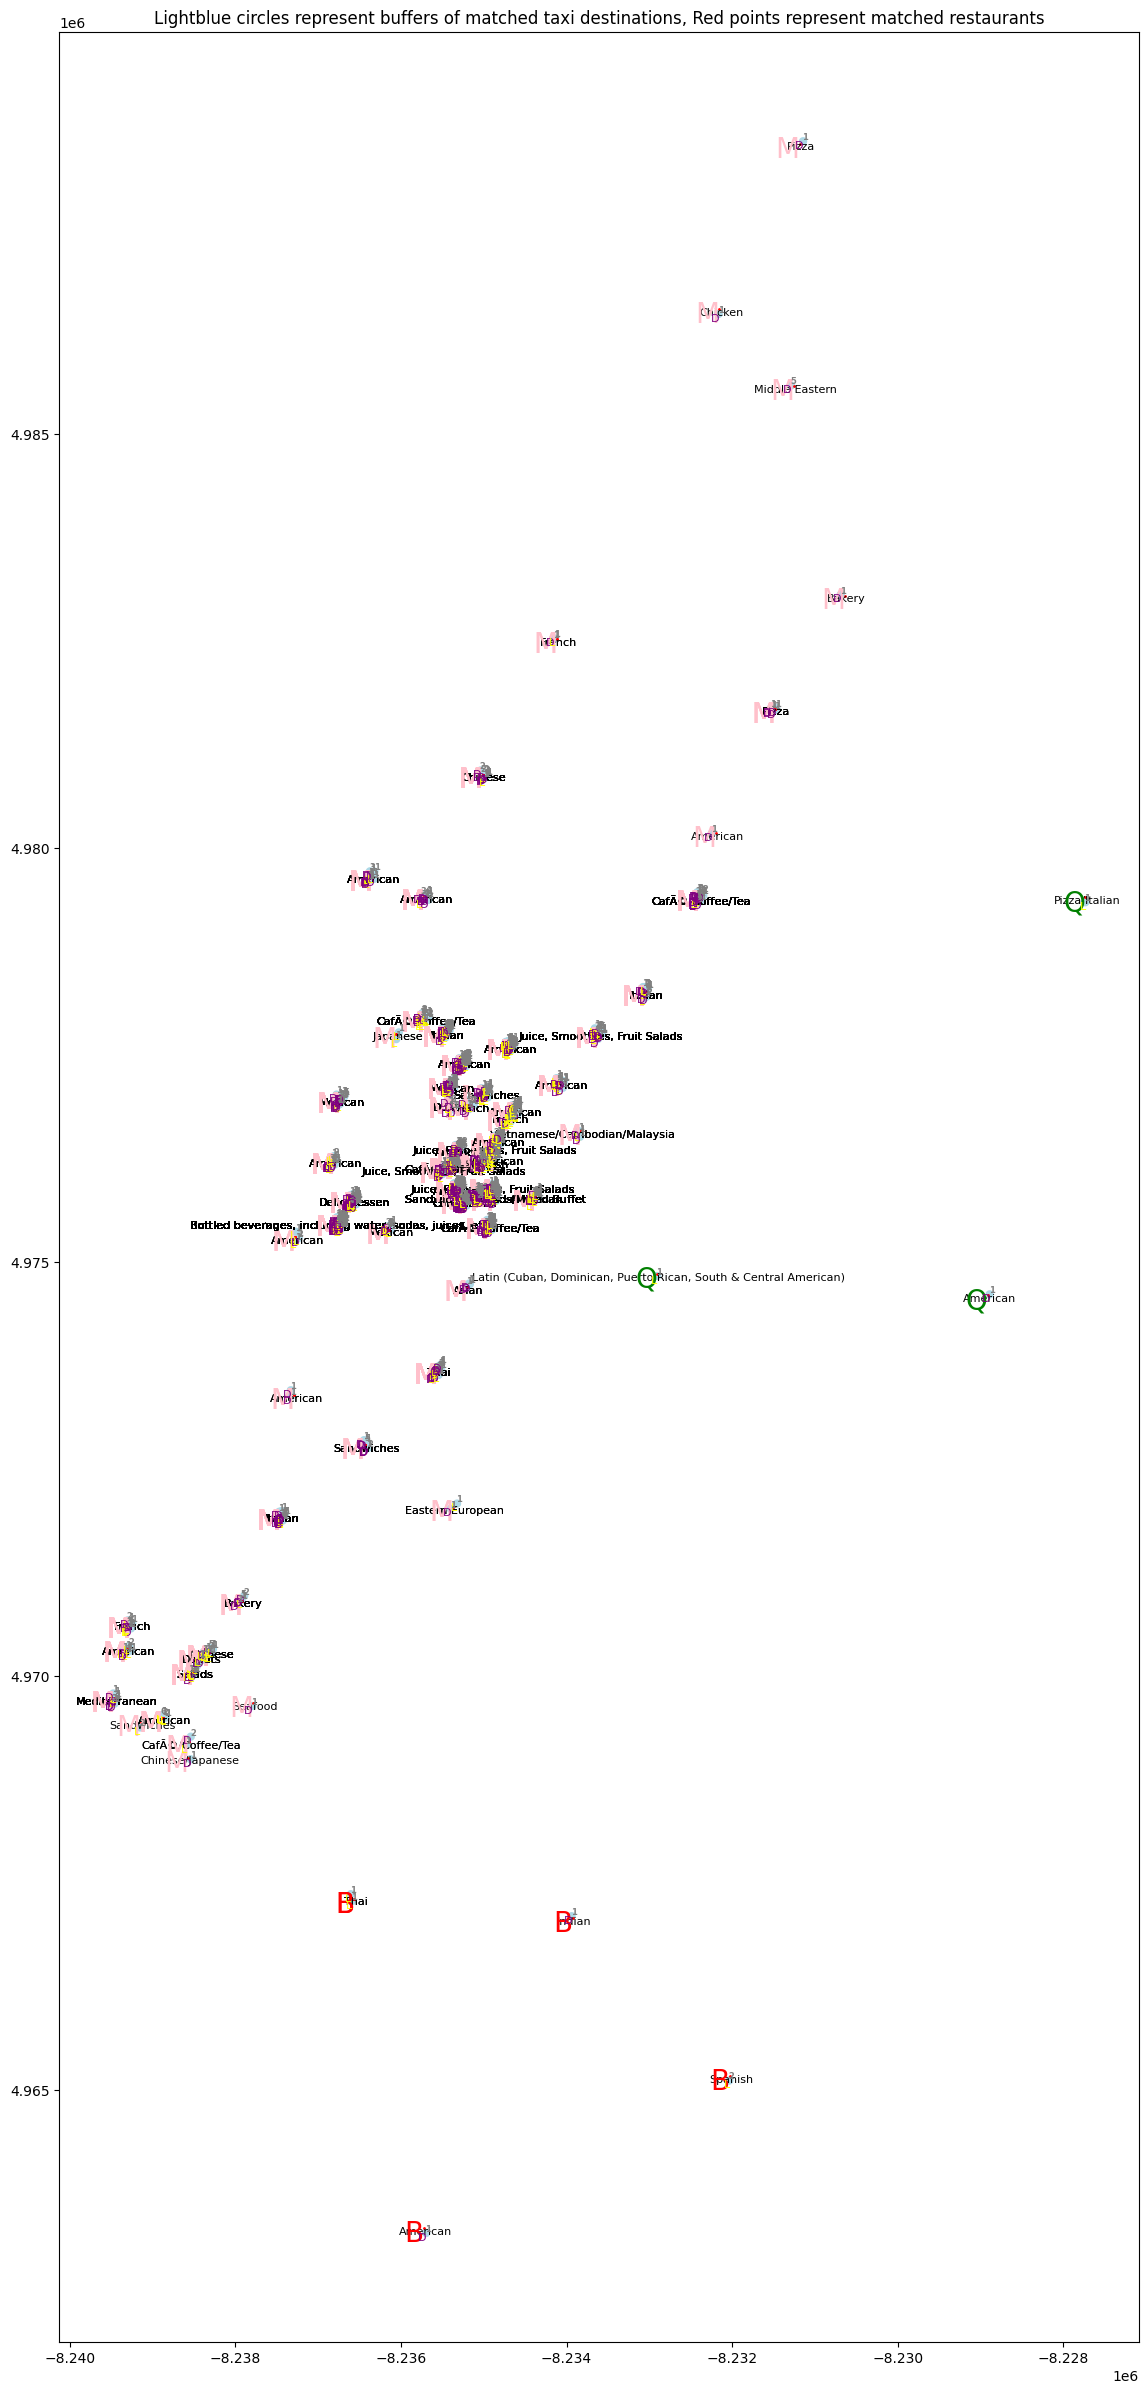

In [435]:
fig, ax=plt.subplots(figsize=(30,30))
taxi_gdf=taxi_gdf.to_crs("EPSG:3857")
taxi_gdf['geometry']=taxi_gdf.buffer(50)
rest_gdf=rest_gdf.to_crs("EPSG:3857")
#ax.set_aspect('equal')
taxi_gdf.plot(ax=ax,label="taxi",color='lightblue')
rest_gdf.plot(ax=ax,label='rest',color='red',markersize=1)
for idx, _ in enumerate(rest_gdf.geometry.representative_point()):
    cuisine = restdf.loc[idx,'CUISINE DESCRIPTION']
    boro = restdf.loc[idx,'BORO']
    ax.text(_.x+20,_.y+20,cuisine,ha="center",va="top",size=8)
    if boro == 'BROOKLYN':
        ax.text(_.x,_.y+100,'B',ha="right",va="top",size=20,color='red')
    if boro == 'MANHATTAN':
        ax.text(_.x,_.y+100,'M',ha="right",va="top",size=20,color='pink')
    if boro == 'QUEENS':
        ax.text(_.x,_.y+100,'Q',ha="right",va="top",size=20,color='green')
for idx, _ in enumerate(taxi_gdf.geometry.representative_point()):
    droptime = taxisdf.loc[idx,'meal']
    num = taxisdf.loc[idx,'passenger_count']
    if droptime == 'L':
        ax.text(_.x+5,_.y+5,droptime,ha="right",va="top",size=8,color='yellow')
    if droptime == 'D':
        ax.text(_.x+5,_.y+5,droptime,ha="right",va="top",size=8,color='purple')
    ax.text(_.x-10,_.y-10,num,ha="left",va="bottom",size=6,color='grey',fontweight='bold')
plt.title('Lightblue circles represent buffers of matched taxi destinations, Red points represent matched restaurants')
plt.show()

I built this map with GeoPandas package, and I added a few features from each dataset into this map. Lightblue circles
 are buffers around each taxi trip destination and the red point within the circle is the location of corresponding 
restaurant. I attached the cuisine and borough information for each restaurant into this map. The large amount of pink
 "M" in this map indicates that most restaurants were located in Manhattan, and lots of different black texts crowds 
in the middle indicates that the variety of food culture in New York. Besides, yellow "L" and purple "D" distinguishes
 the lunch meal and dinner meal, which both dominate in the map. And the small grey number stands for the number of 
passengers in each drive.

## 4. Answer the following exploratory data analysis questions, providing a descriptive figure summarizing the results for each:

### a. How far do people travel based on different types of cuisine (“CUISINE DESCRIPTION”)? How does this differ based on the borough where the restaurant is located (“BORO”, one of 5 large NYC neighborhoods)? How does this differ by meal time?


*For questions above, only link_result dataframe (matched data) will be considered because only those taxi trips were assumed to be a trip for meals.*

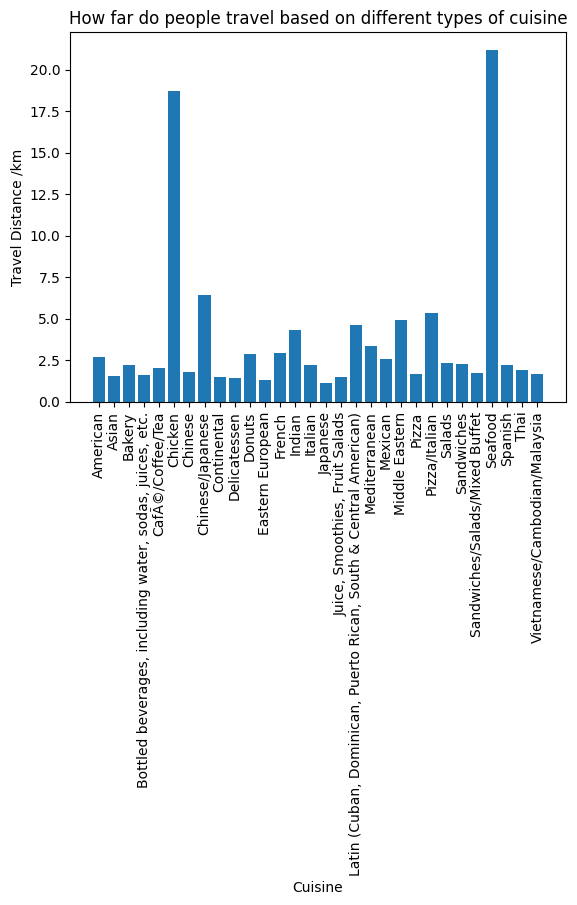

In [458]:
# Cuisine part
dis_cui=link_result['trip_distance'].groupby(link_result['CUISINE DESCRIPTION']).mean()
cui_dict=dict(dis_cui)
plt.bar(range(len(cui_dict)),list(cui_dict.values()))
plt.xticks(range(len(cui_dict)),list(cui_dict.keys()),rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Travel Distance /km')
plt.title('How far do people travel based on different types of cuisine')
plt.show()

In [459]:
counter1=link_result['trip_distance'].groupby(link_result['CUISINE DESCRIPTION']).count()
dict(counter1)

{'American': 293,
 'Asian': 13,
 'Bakery': 6,
 'Bottled beverages, including water, sodas, juices, etc.': 90,
 'CafÃ©/Coffee/Tea': 85,
 'Chicken': 1,
 'Chinese': 20,
 'Chinese/Japanese': 1,
 'Continental': 65,
 'Delicatessen': 68,
 'Donuts': 51,
 'Eastern European': 2,
 'French': 32,
 'Indian': 1,
 'Italian': 53,
 'Japanese': 2,
 'Juice, Smoothies, Fruit Salads': 72,
 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)': 1,
 'Mediterranean': 8,
 'Mexican': 59,
 'Middle Eastern': 1,
 'Pizza': 17,
 'Pizza/Italian': 1,
 'Salads': 10,
 'Sandwiches': 30,
 'Sandwiches/Salads/Mixed Buffet': 35,
 'Seafood': 1,
 'Spanish': 16,
 'Thai': 21,
 'Vietnamese/Cambodian/Malaysia': 3}

We find that some cuisine types contain only 1 instance, those data are not representative. I will remove those ones and plot another figure.

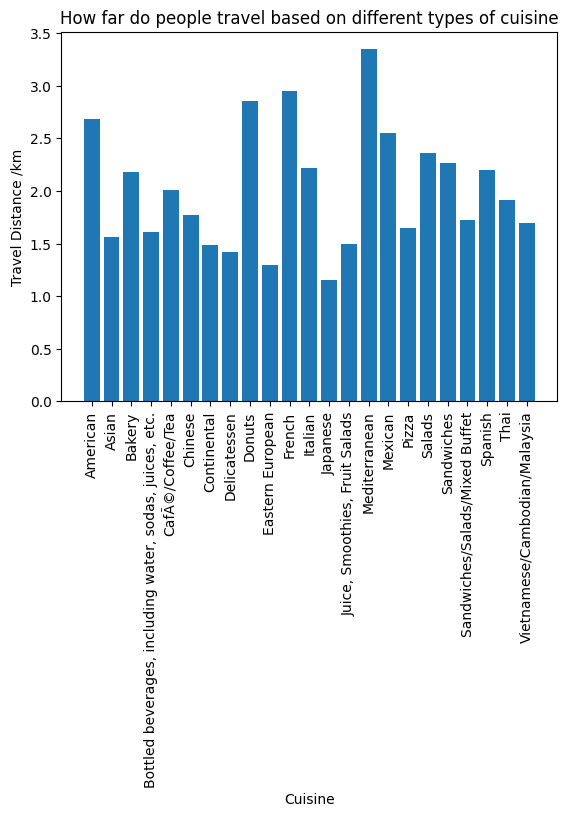

In [460]:
singletons=[]
for k in dict(counter1):
    if dict(counter1)[k]==1:
        singletons.append(k)
cui_dict2=cui_dict.copy()
for s in singletons:
    del cui_dict2[s]
plt.bar(range(len(cui_dict2)),list(cui_dict2.values()))
plt.xticks(range(len(cui_dict2)),list(cui_dict2.keys()),rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Travel Distance /km')
plt.title('How far do people travel based on different types of cuisine')
plt.show()

According to above figure, we can conclude that people will travel further to have meals with Mediterranean, French and Donuts cuisines.

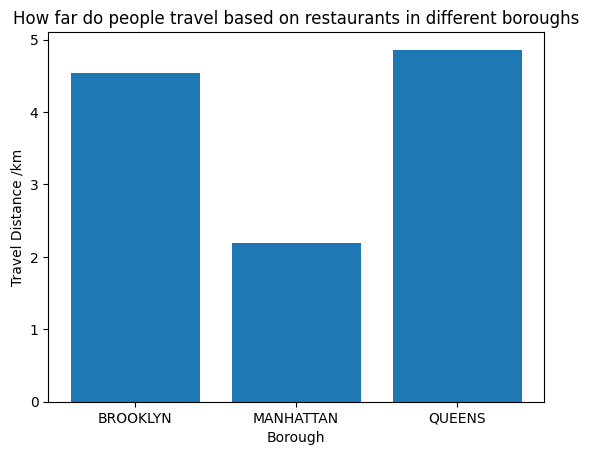

In [422]:
# Borough part
dis_bor=link_result['trip_distance'].groupby(link_result['BORO']).mean()
bor_dict=dict(dis_bor)
plt.bar(range(len(bor_dict)),list(bor_dict.values()))
plt.xticks(range(len(bor_dict)),list(bor_dict.keys()))
plt.xlabel('Borough')
plt.ylabel('Travel Distance /km')
plt.title('How far do people travel based on restaurants in different boroughs')
plt.show()

It seems that restaurants in QUEENS borough and BROOKLYN borough are more attractive, people are willing to take a longer trip to there for meals. But as we can see from the previous generated map (or through counter), most matched restaurants are located in Manhattan Borough. Hence, we can not acquire high statistical significance from this figure.

In [437]:
counter2=link_result['trip_distance'].groupby(link_result['BORO']).count()
dict(counter2)

{'BROOKLYN': 5, 'MANHATTAN': 1050, 'QUEENS': 3}

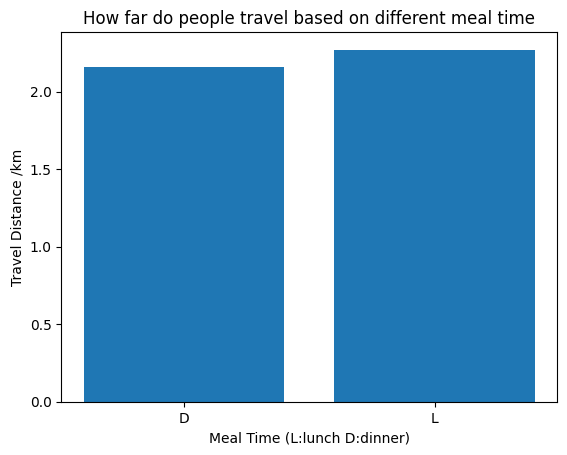

In [439]:
# Meal time part
dis_mtime=taxisdf['trip_distance'].groupby(taxisdf['meal']).mean()
mtime_dict=dict(dis_mtime)
plt.bar(range(len(mtime_dict)),list(mtime_dict.values()))
plt.xticks(range(len(mtime_dict)),list(mtime_dict.keys()))
plt.xlabel('Meal Time (L:lunch D:dinner)')
plt.ylabel('Travel Distance /km')
plt.title('How far do people travel based on different meal time')
plt.show()

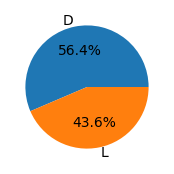

In [443]:
counter3=taxisdf['trip_distance'].groupby(taxisdf['meal']).count()
dict(counter3)
plt.figure(figsize=(3,2))
plt.pie(dict(counter3).values(),labels=dict(counter3).keys(),autopct='%0.1f%%')
plt.show()

From this figure, we can conclude that people will travel further a little bit during lunch time, but the discrepancy is slight.

### b. What is the average tipping rate for different types of cuisine? How does this differ by borough, by meal time, and by number of passengers in the taxi?


In [454]:
# Cuisine part
# First compute tipping rate of each individual trip
tiprates=[]
for j in range(len(taxisdf)):
    tiprates.append(taxisdf.iloc[j,-4]/taxisdf.iloc[j,-3])
taxisdf2=taxisdf.copy()
link_result2=link_result.copy()
taxisdf2['tip_rate']=tiprates
link_result2['tip_rate']=tiprates

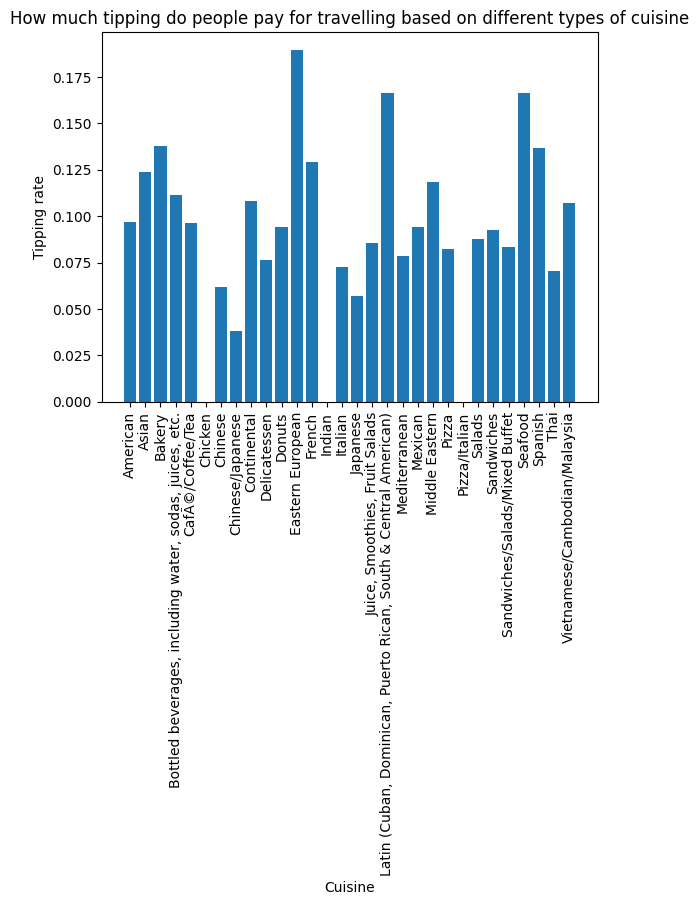

In [463]:
tipr_cui=link_result2['tip_rate'].groupby(link_result2['CUISINE DESCRIPTION']).mean()
cui_dict3=dict(tipr_cui)
plt.bar(range(len(cui_dict3)),list(cui_dict3.values()))
plt.xticks(range(len(cui_dict3)),list(cui_dict3.keys()),rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Tipping rate')
plt.title('How much tipping do people pay for travelling based on different types of cuisine')
plt.show()

Similar processing, remove those cuisine types with only 1 instance.

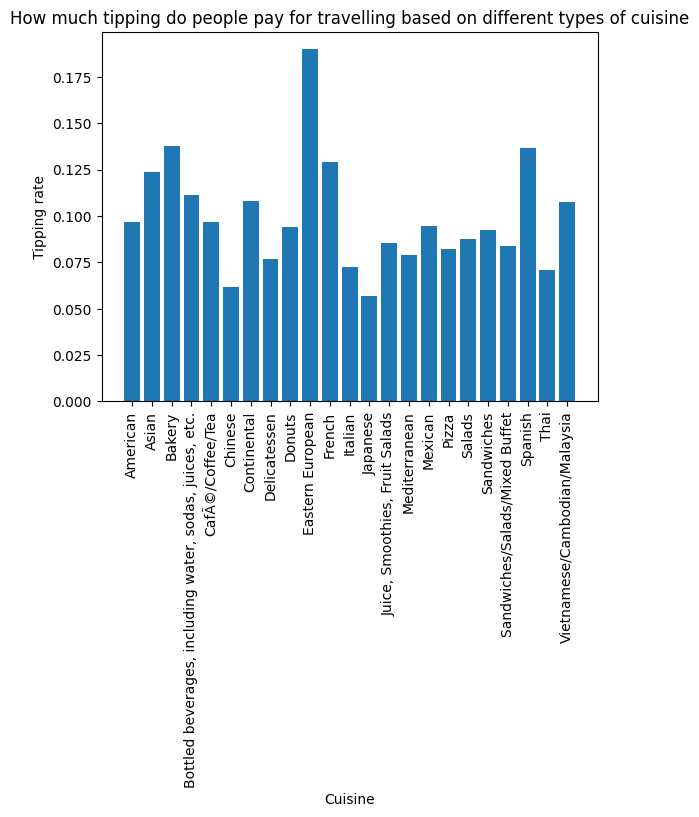

In [464]:
cui_dict4=cui_dict3.copy()
for s in singletons:
    del cui_dict4[s]
plt.bar(range(len(cui_dict4)),list(cui_dict4.values()))
plt.xticks(range(len(cui_dict4)),list(cui_dict4.keys()),rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Tipping rate')
plt.title('How much tipping do people pay for travelling based on different types of cuisine')
plt.show()

From above figure, we can find that customers of Eastern European restaurants tend to pay most tips, while customers
of Chinese and Japanese restaurants paid least tips for their taxi trips.

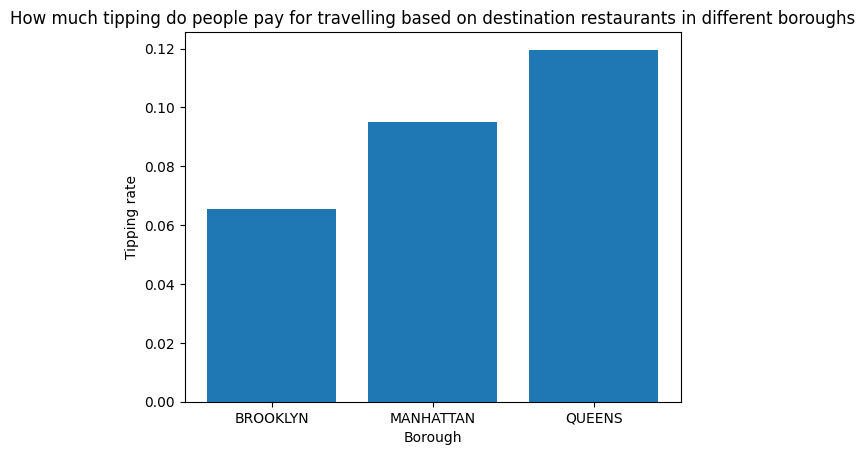

In [465]:
# Borough part
tipr_bor=link_result2['tip_rate'].groupby(link_result2['BORO']).mean()
bor_dict2=dict(tipr_bor)
plt.bar(range(len(bor_dict2)),list(bor_dict2.values()))
plt.xticks(range(len(bor_dict2)),list(bor_dict2.keys()))
plt.xlabel('Borough')
plt.ylabel('Tipping rate')
plt.title('How much tipping do people pay for travelling based on destination restaurants in different boroughs')
plt.show()

People heading to restaurants in Queens tend to pay more tips for their taxi trips, while people heading to restaurants in Brooklyn paid less tips.

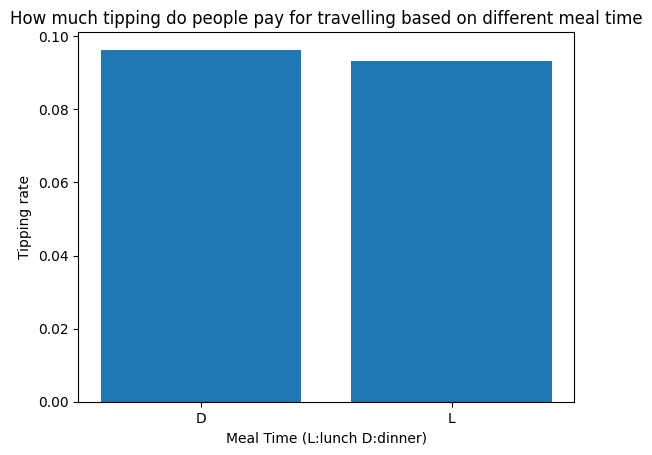

In [466]:
# Meal time part
tipr_mtime=taxisdf2['tip_rate'].groupby(taxisdf2['meal']).mean()
mtime_dict2=dict(tipr_mtime)
plt.bar(range(len(mtime_dict2)),list(mtime_dict2.values()))
plt.xticks(range(len(mtime_dict2)),list(mtime_dict2.keys()))
plt.xlabel('Meal Time (L:lunch D:dinner)')
plt.ylabel('Tipping rate')
plt.title('How much tipping do people pay for travelling based on different meal time')
plt.show()

People will pay a little more tips for taxi trips during dinner time, but still slight discrepancy.

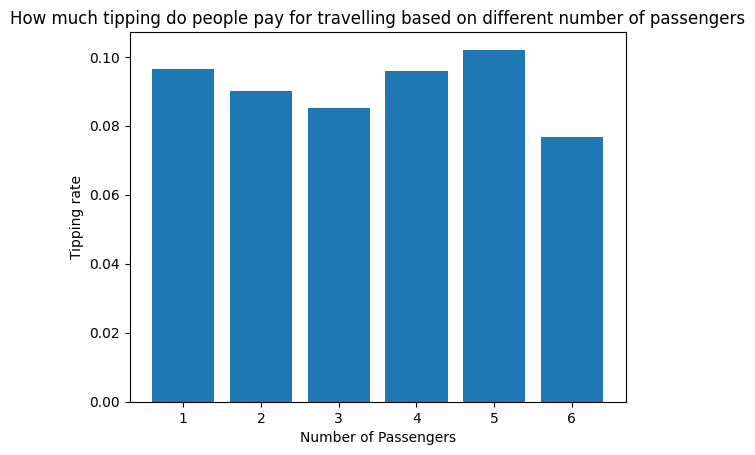

In [468]:
# Number of passengers part
tipr_nop=taxisdf2['tip_rate'].groupby(taxisdf2['passenger_count']).mean()
nop_dict=dict(tipr_nop)
plt.bar(range(len(nop_dict)),list(nop_dict.values()))
plt.xticks(range(len(nop_dict)),list(nop_dict.keys()))
plt.xlabel('Number of Passengers')
plt.ylabel('Tipping rate')
plt.title('How much tipping do people pay for travelling based on different number of passengers')
plt.show()

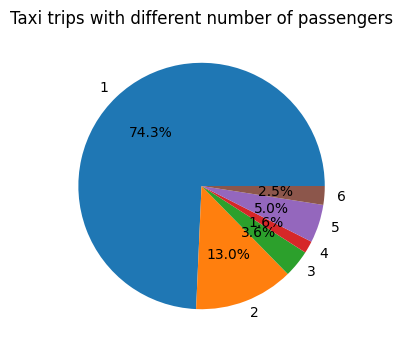

In [472]:
counter4=taxisdf2['tip_rate'].groupby(taxisdf2['passenger_count']).count()
dict(counter4)
plt.figure(figsize=(5,4))
plt.pie(dict(counter4).values(),labels=dict(counter4).keys(),autopct='%0.1f%%')
plt.title('Taxi trips with different number of passengers')
plt.show()

From the bar chart above, we can see that taxi trips with 5 passengers were attached with highest tips, single or 4 
passengers tend to offer quite many tips as well. Anyway, taxi drivers who had 6 passengers were likely to receive 
least tips.

**Besides, I found that this subquestion is not associative with the meal conditions, so I am inspired to do the same 
statistics on the complete taxi data to figure out if there are any differences.**

In [474]:
complete_tiprates=[]
for j in range(len(taxi_data)):
    complete_tiprates.append(taxi_data.iloc[j,-2]/taxi_data.iloc[j,-1])
taxi_data2=taxi_data.copy()
taxi_data2['tip_rate']=complete_tiprates

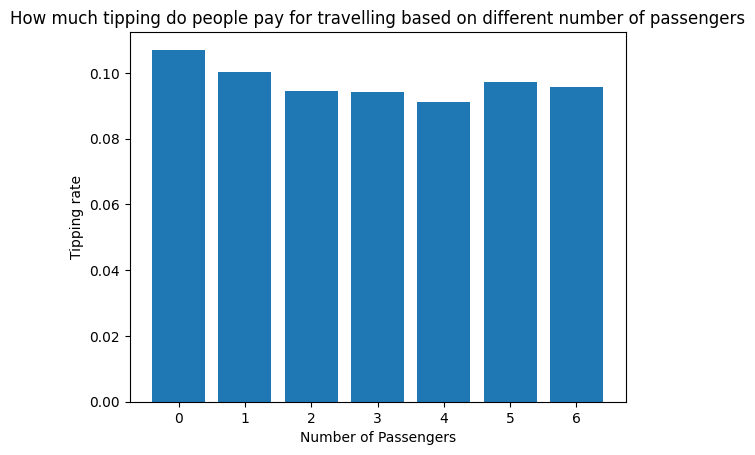

In [476]:
tipr_nop2=taxi_data2['tip_rate'].groupby(taxi_data2['passenger_count']).mean()
nop_dict2=dict(tipr_nop2)
plt.bar(range(len(nop_dict2)),list(nop_dict2.values()))
plt.xticks(range(len(nop_dict2)),list(nop_dict2.keys()))
plt.xlabel('Number of Passengers')
plt.ylabel('Tipping rate')
plt.title('How much tipping do people pay for travelling based on different number of passengers')
plt.show()

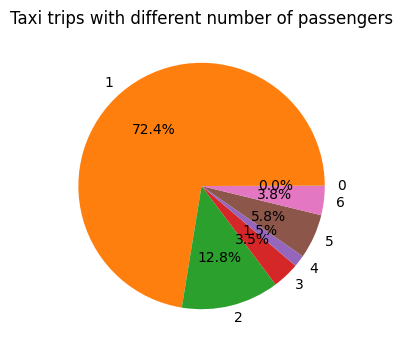

In [478]:
counter5=taxi_data2['tip_rate'].groupby(taxi_data2['passenger_count']).count()
dict(counter5)
plt.figure(figsize=(5,4))
plt.pie(dict(counter5).values(),labels=dict(counter5).keys(),autopct='%0.1f%%')
plt.title('Taxi trips with different number of passengers')
plt.show()

This bar chart extracted from complete taxi data seems more even, there is no obvious discrepancy between tip rates 
with different number of passengers except for 0 passenger which makes no sense. Single passenger still paid higher 
tips, while 6-passengers trips did not fall far behind as well.

## 5. Describe how you would set up a predictive model of restaurant cuisine type to be visited by a taxi rider based on information present in the two datasets. Feel free to suggest other data sources you would bring in to support your predictive model. Please note you do NOT have to implement this model.

It is a typical multiclass classification problem.<br>
<br>
From just observing the plots generated previously, I discovered that there are a few cuisine groups within which some cuisine subtypes have similar patterns. To be specific, we can divide all cuisine types into a few groups. For example, Chinese, Japanese and Thai parts (Eastern Asia) all reflected short travel distance and low tip rate pattern. French, Donuts and Mediterranean (French-like) were associative with longest trip distance and moderate tip rate. American, Mexican, Salads and Sandwiches (US composite) showed similar pattern with middle tip rate and a little bit longer distance above average. Other specific types such as drinks (with shortest distances) and Eastern European (with extremely high tip rate) can be classified separately as well.<br>
<br>
All above processes can be achieved with Decision Tree or Random Forest. Basically, we can notice that all the singleton type (outliers such as Seafood, Chicken, Latin...) held longer distances than normal types, so we can build the first separator with high distance threshold to filter out outliers. Then we can build following layers with different ranges in Trip distances and Tip rates to distinguish those primary types like Eastern Asia, US composite, Drinks...

As shown in the figures, different types within each group have almost identical patterns with distances and tip rates 
features. Therefore, we will have to add more features or supplementary datasets into consideration if we want to build a complete predictive model. We can use passenger_count, total_amount or more numerical variables and meal time, borough or more categorical variables. We can also add more data sources with information about passengers like age/ enthnicity, or maybe demography information in the block. Hopefully these additional sources and features are helpful to improve the performance of the predictive model. Anyway, we can build a L1-penalized multinomial logistic regression model and use Lasso regularization to select most relevant variables. Following is just a sample implementation with link_result as training data.

In [509]:
from sklearn import linear_model, preprocessing

In [495]:
vbs = ['passenger_count','trip_distance','fare_amount','total_amount','tip_rate']
training = link_result2[vbs]
mealstime=[]
for t in list(taxisdf['tpep_dropoff_datetime']):
    if t <= "14:00:00":
        mealstime.append('0') # 0 for lunch
    else:
        mealstime.append('1') # 1 for dinner
training['meal'] = mealstime
training['CUISINE DESCRIPTION'] = link_result2['CUISINE DESCRIPTION']
training

,passenger_count,trip_distance,fare_amount,total_amount,tip_rate,meal,CUISINE DESCRIPTION
0,2,0.90,7.0,7.80,0.000000,0,Continental
1,1,1.50,9.5,12.36,0.166667,0,American
2,1,1.40,12.0,15.36,0.166667,0,American
3,1,0.50,5.0,6.96,0.166667,0,French
4,1,0.50,5.0,5.80,0.000000,0,"Juice, Smoothies, Fruit Salads"
...,...,...,...,...,...,...,...
1053,1,0.49,4.5,7.68,0.179688,1,"Bottled beverages, including water, sodas, jui..."
1054,1,2.20,13.0,17.00,0.129412,1,American
1055,2,1.20,7.5,8.80,0.000000,1,American
1056,1,0.69,6.0,6.80,0.000000,0,American


In [510]:
logs = linear_model.LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga')
label = training['CUISINE DESCRIPTION']
features = training.iloc[:,:-1]
norm = preprocessing.scale(features)
model = logs.fit(norm,label)

In [514]:
model.predict(training.iloc[2:4,:-1])

array(['Mexican', 'American'], dtype=object)